# Coding Exercises (Part 13)

## Financial Data: Advanced Analysis Techniques

## Option 1: Self_guided

__Import__ the Dow Jones Industrial Average Index (__DJIA__) dataset (__djia.csv__).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
djia=pd.read_csv("djia.csv",index_col=0,parse_dates=True)
djia.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1989-12-29,2736.35,2763.01,2726.96,2753.20,2753.20,14580000
1990-01-02,2748.72,2811.65,2732.51,2810.15,2810.15,20680000
1990-01-03,2814.20,2834.04,2786.26,2809.73,2809.73,23620000
1990-01-04,2804.39,2821.46,2766.42,2796.08,2796.08,24370000
1990-01-05,2786.90,2810.15,2758.11,2773.25,2773.25,20290000


__Calculate__, __Visualize__ and __Compare__ the DJIA __SMA50 vs. SMA200__ (based on daily Close Prices). __Select__ the day __May 15, 2017__ and __Verify__, whether a Trader with __SMA Momentum Strategy__ was __invested__ (long) in the DJIA at this day! 

In [5]:
djia_close=djia.Close
djia_close.head()

Date
1989-12-29    2753.20
1990-01-02    2810.15
1990-01-03    2809.73
1990-01-04    2796.08
1990-01-05    2773.25
Name: Close, dtype: float64

In [6]:
djia_close=djia.Close.to_frame()
djia_close.head()

,Close
Date,
1989-12-29,2753.20
1990-01-02,2810.15
1990-01-03,2809.73
1990-01-04,2796.08
1990-01-05,2773.25


In [7]:
sma50=djia_close.rolling(window=50).mean()
sma50=sma50.dropna()
sma50.head()

,Close
Date,
1990-03-12,2654.4774
1990-03-13,2652.9044
1990-03-14,2650.4582
1990-03-15,2648.1780
1990-03-16,2647.0808


In [8]:
sma200=djia_close.rolling(window=200).mean()
sma200=sma200.dropna()
sma200.head()

,Close
Date,
1990-10-12,2718.16325
1990-10-15,2716.47895
1990-10-16,2714.33415
1990-10-17,2712.22485
1990-10-18,2710.50805


In [9]:
print("sma 50", sma50.loc["May 15, 2017"])
print("sma200",sma200.loc["May 15, 2017"])
# as sma50 is above sma200, investors are longing the market

sma 50 Close    20786.4816
Name: 2017-05-15 00:00:00, dtype: float64
sma200 Close    19522.93675
Name: 2017-05-15 00:00:00, dtype: float64


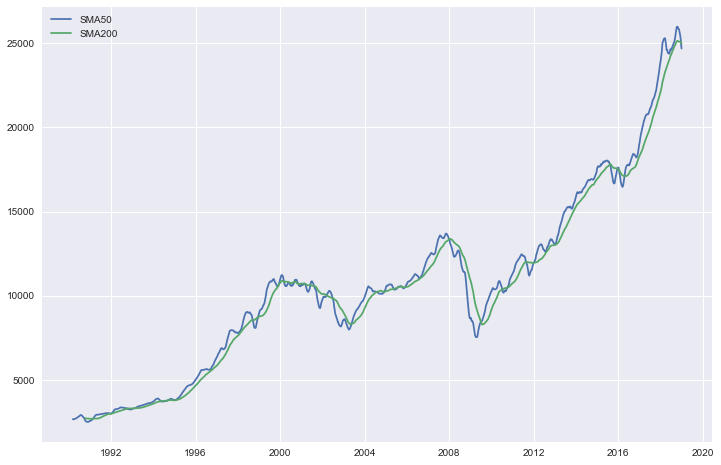

In [30]:
plt.style.use("seaborn")
plt.figure(figsize=(12,8))
plt.plot(sma50.index,sma50.Close,label="SMA50")
plt.plot(sma200.index,sma200.Close,label="SMA200")
# when using legend(), label is supposed to be given in plot() function
plt.legend()
plt.show()

__Calculate__ the DJIA __36 months rolling mean return__ and the __36 months rolling standard deviation__ of returns (based on monthly returns of Close prices). __Visualize__, __Compare__ and __indicate__, whether there is a __positive or negative relation__ between __risk and return__!  

In [11]:
djia_close.head()

,Close
Date,
1989-12-29,2753.20
1990-01-02,2810.15
1990-01-03,2809.73
1990-01-04,2796.08
1990-01-05,2773.25


In [12]:
month_close=djia_close.resample("m",kind="period").last()
month_close.head()

,Close
Date,
1989-12,2753.20
1990-01,2590.54
1990-02,2627.25
1990-03,2707.21
1990-04,2656.76


In [13]:
month_return=month_close.pct_change().dropna()
month_return.head()

,Close
Date,
1990-01,-0.059080
1990-02,0.014171
1990-03,0.030435
1990-04,-0.018635
1990-05,0.082770


In [14]:
month_36=month_return.rolling(window=36).mean().dropna()
month_36.rename(columns={"Close":"Mean"},inplace=True)
month_36.head()

,Mean
Date,
1992-12,0.005837
1993-01,0.007553
1993-02,0.007669
1993-03,0.007354
1993-04,0.007810


In [15]:
month_36["Std"]=month_return.rolling(window=36).std().dropna()
month_36.head()

,Mean,Std
Date,,
1992-12,0.005837,0.040028
1993-01,0.007553,0.038459
1993-02,0.007669,0.038486
1993-03,0.007354,0.038340
1993-04,0.007810,0.038119


In [16]:
corr_matrix=month_36.corr()
corr_matrix

,Mean,Std
Mean,1.000000,-0.386493
Std,-0.386493,1.000000


In [17]:
import seaborn as sns

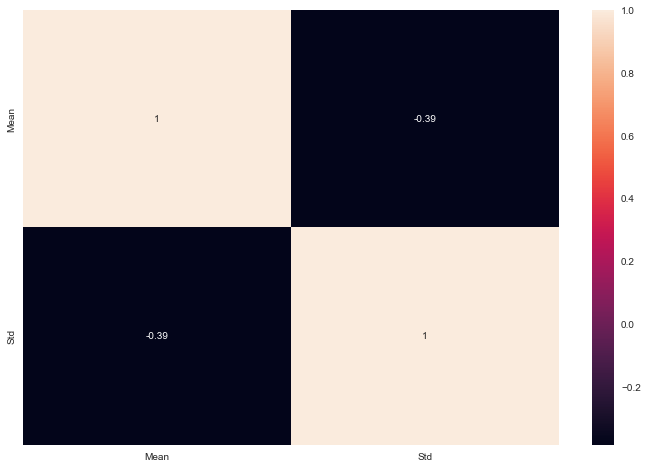

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

__Import__ the __S&P 500 Total Return Index__ dataset (__SP500_TR.csv__) and __create__ the annual __Return Triangle__. Based on historical data, are there any time periods of __11 Years or longer__ where investors __lost money__?

In [19]:
sp=pd.read_csv("SP500_TR.csv",parse_dates=True,index_col=0)
sp.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1988-12-30,288.12,288.12,288.12,288.12,288.12,0
1989-01-03,285.65,285.65,285.65,285.65,285.65,0
1989-01-04,289.99,289.99,289.99,289.99,289.99,0
1989-01-05,290.61,290.61,290.61,290.61,290.61,0
1989-01-06,291.29,291.29,291.29,291.29,291.29,0


In [20]:
annual_sp_return=sp.resample("y",kind="period").last().Close.to_frame().pct_change().dropna()
annual_sp_return.head()

,Close
Date,
1989,0.316847
1990,-0.031048
1991,0.304654
1992,0.076205
1993,0.100779


In [21]:
sp_10year_return=annual_sp_return.rolling(window=10).mean().dropna()
sp_10year_return

,Close
Date,
1998,0.200544
1999,0.189901
2000,0.183902
2001,0.141550
2002,0.111829
2003,0.130436
2004,0.139996
2005,0.107332
2006,0.100165


__Import__ the monthly returns of the __S&P 500__ Price Return Index and the __DJIA__ Price Return Index (__sp500_djia.csv__). 

In [22]:
sp_djia=pd.read_csv("sp500_djia.csv",parse_dates=True,index_col=0)
sp_djia.head()

,SP500,DJIA
Date,,
1990-01-01,-0.068817,-0.059080
1990-02-01,0.008539,0.014171
1990-03-01,0.024255,0.030435
1990-04-01,-0.026887,-0.018635
1990-05-01,0.091989,0.082770


__Calculate__ and __Visualize__ the 36 months __rolling correlation__ between S&P 500 returns and DJIA returns.

In [33]:
sp_djia.DJIA

Date
1990-01-01   -0.059080
1990-02-01    0.014171
1990-03-01    0.030435
1990-04-01   -0.018635
1990-05-01    0.082770
                ...   
2018-08-01    0.021626
2018-09-01    0.019006
2018-10-01   -0.050742
2018-11-01    0.016830
2018-12-01   -0.096954
Name: DJIA, Length: 348, dtype: float64

In [23]:
data_36month=sp_djia.SP500.to_frame().rolling(36).corr(sp_djia.DJIA).dropna()
data_36month.head()

,SP500
Date,
1992-12-01,0.958593
1993-01-01,0.955134
1993-02-01,0.954807
1993-03-01,0.955167
1993-04-01,0.950339


In [24]:
data_36month.rename(columns={"SP500":"corr"},inplace=True)

In [25]:
data_36month.head()

,corr
Date,
1992-12-01,0.958593
1993-01-01,0.955134
1993-02-01,0.954807
1993-03-01,0.955167
1993-04-01,0.950339


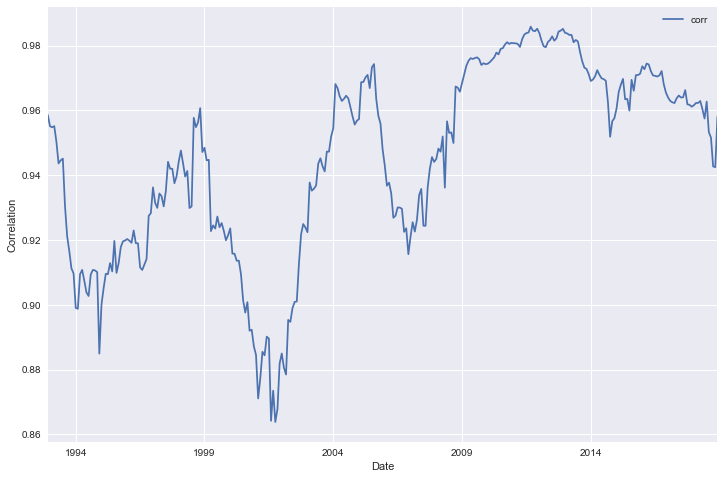

In [26]:
data_36month.plot(figsize=(12,8),grid=True)
plt.ylabel("Correlation")
plt.show()

------------------------

# Recap

117. calculate SMA50

`df.rolling(window = 50).mean()`

119. plot more than two lines in one figure

step1: make a figure   `plt.figure(figsize=(12,8))`

step2: plot lines with labels each time `plt.plot(data, x, y,label)`

when __data is series type, x,y can be ignored__

step3: locate the legends to a suitable place `plt.legend(loc)`


128. calculate __log__ return 

`np.log(df/df.shift())`

133. calculate the correlation between one column and another

`df.col1.corr(df.col2)`

133. calculate the rolling correlation between two time series

`df1.rolling(window=36).corr(df2)`